<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 2</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 25. April, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Zellulärer Automat</td>
<td style="border-style: none; width: 1%; text-align: right">(6 Bonuspunkte)</td></tr></table>



In dieser *optionalen Aufgabe* betrachten wir einen **zellulären Automaten**, dessen Zellen durch drei Parameter $a, b, c \in [0, 1)$ beschrieben werden, welche die Konzentration dreier Spezies beschreiben sollen. Zu Anfang seien die Werte zufällig aus dem möglichen Wertebereich gewählt. 

Der zelluläre Automat funktioniert nun nach den folgenden Regeln:
* Für jede Zelle wird der durchschnittliche Wert $\overline{a}, \overline{b}, \overline{c}$ als Mittelwert der acht umgebenden Zellen sowie des Werts der Zelle selbst berechnet.
* Der neue Zustand ist dann gegeben durch

$\quad a = \min\left(1.0,\; \overline{a}\cdot\left(1. + \overline{b} - \overline{c}\right)\right)$

$\quad b = \min\left(1.0,\; \overline{b}\cdot \left(1. + \overline{c} - \overline{a}\right)\right)$

$\quad c = \min\left(1.0,\; \overline{c}\cdot \left(1. + \overline{a} - \overline{b}\right)\right)$

Beachten Sie, dass alle Zellen *gleichzeitig* in den neuen Zustand übergehen, d.h. die Berechnung der Mittelwerte darf ausschließlich mit den Werten des vorherigen Iterationsschritts passieren und nicht mit denen der schon partiell veränderten Matrix.

In den unteren beiden Zellen finden Sie ein Skelett, das Sie um das Update der Zellen erweitern sollen. Visualisiert werden kann der zelluäre Automat, in dem eine der drei Konzentrationen dargestellt wird. Dazu stellen wir Ihnen die Funktion *update_image* zur Verfügung, mit der Sie die Änderung der Konzentrationen zeitlich aufgelöst verfolgen können. 

**update_image()**

In [1]:
using PyPlot

external_window = false

try 
    pygui(true) # activate display in external window
    external_window = true
    catch e # probably in JuliaBox
end

function update_image(fig, image, data)
    image[:set_data](data)
    if external_window == false
        IJulia.clear_output(true)
        display(fig)
    else
        fig[:canvas][:draw]()
    end
end

update_image (generic function with 1 method)

** Programmskelett**

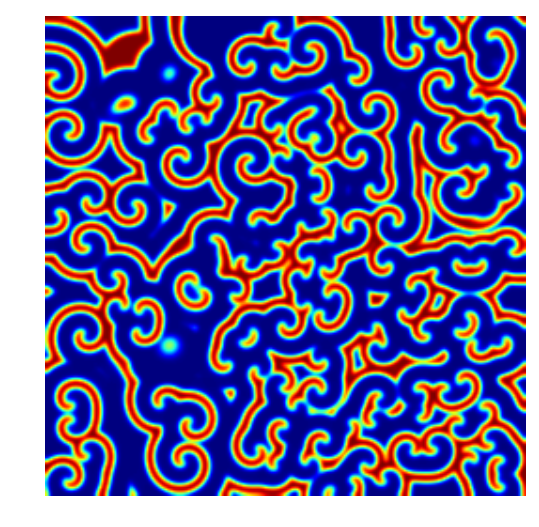

In [2]:
L = 256 # system size

function matrix_avg(M)
    s = size(M)
    M, N = sub(M, 1:s[1], 1:s[2]), zeros(s[1],s[2])
    for i in eachindex(M)
        MSub = sub(M, max(1,i[1]-1):min(s[1],i[1]+1),max(1,i[2]-1):min(s[2],i[2]+1))
        N[i] = (sum(MSub) - M[i])/(length(MSub) - 1)
    end
    return N
end

function automate(center, cross_1, cross_2)
    s=size(center)
    min(1.,center.*(1. .+ cross_1 .- cross_2))
end

automaton, avg_automaton = [rand(L, L) for i=1:3], [zeros(L, L) for i=1:3]

fig = figure()
ax = fig[:add_subplot](111)
image = imshow(automaton[1])
axis("off")

for step in 1:200
    avg_automaton = [matrix_avg(automaton[i]) for i=1:3]
    automaton = [automate(avg_automaton[(i-1)%3+1], avg_automaton[(i)%3+1], avg_automaton[(i+1)%3+1]) for i=1:3]
    
    # updated automaton[1] is set as the new image
   update_image(fig, image, automaton[1])
end

if external_window == false
    close()
end